In [1]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import polars as pl

In [67]:
data_path = 'data/uk-crime/'

In [68]:
outcome_files = glob(os.path.join(os.getcwd(), data_path, '*', '*outcomes.csv'))

In [4]:
len(outcome_files)

1508

In [17]:
dict((('Crime ID', pl.Utf8),
     ('Month', pl.Int8),
     ('Reported By', pl.Utf8),
     ('Falls within', pl.Utf8),
     ('Longitude', pl.Float64),
     ('Latitude', pl.Float64),
     ('LSOA code', pl.Utf8),
     ('LSOA name', pl.Utf8),
     ('Outcome type', pl.Utf8)))

{'Crime ID': Utf8,
 'Month': Int8,
 'Reported By': Utf8,
 'Falls within': Utf8,
 'Longitude': Float64,
 'Latitude': Float64,
 'LSOA code': Utf8,
 'LSOA name': Utf8,
 'Outcome type': Utf8}

In [18]:
dtype = dict((('Crime ID', pl.Utf8),
     ('Month', pl.Int8),
     ('Reported By', pl.Utf8),
     ('Falls within', pl.Utf8),
     ('Longitude', pl.Float64),
     ('Latitude', pl.Float64),
     ('LSOA code', pl.Utf8),
     ('LSOA name', pl.Utf8),
     ('Outcome type', pl.Utf8)))

In [24]:
list(map(pl.read_csv, outcome_files))[0]

Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
str,str,str,str,f64,f64,str,str,str,str
"""851ac53841d89a…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"
"""d40611fb62cdf2…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"
"""d0a9089d1f3624…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"
"""9f82bf249db1e2…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"
"""d9e2f004392c8f…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"
"""52e81cf453603c…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"
"""826fe2ff9e98dc…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Suspect charge…"
"""fd15f85afcc51b…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"
"""19b674e0e3740f…","""2020-02""","""Avon and Somer…","""Avon and Somer…",null,null,"""No location""",null,null,"""Unable to pros…"


In [21]:
df_outcome = pl.concat(map(pl.read_csv, outcome_files))

ShapeError: unable to vstack, dtypes for column "Longitude" don't match: `f64` and `str`

In [69]:
df_outcome = pd.concat(map(pd.read_csv, outcome_files))
df_outcome

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,851ac53841d89ab2cfc4ccdcb543aecd84e9d173b147eb...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
1,d40611fb62cdf2548679c61afd7d501c14fa5e8349823f...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
2,d0a9089d1f3624f9acf3af80f87ac371d3d59db96b3694...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
3,9f82bf249db1e219d8135f3d297c62b0ca81cbf8ec0e04...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
4,d9e2f004392c8f46a988f1409be684582f5df40bb44f24...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
3595,9bcc03f251f9b031904f80bf2addb8c8c124ee85539b93...,2023-01,Wiltshire Police,Wiltshire Police,-1.756233,51.561152,On or near Frobisher Drive,E01015572,Swindon 016B,Unable to prosecute suspect
3596,6c2d9486b0fcf6c7dd568fb2d04306d4e3468cd378c777...,2023-01,Wiltshire Police,Wiltshire Police,-1.848971,51.488063,On or near Norborne Road,E01031884,Wiltshire 012E,Unable to prosecute suspect
3597,80e2338fa2c3af94d10ffac27a977866288b810671f7c2...,2023-01,Wiltshire Police,Wiltshire Police,-2.141712,51.362075,On or near Telford Drive,E01032070,Wiltshire 021D,Unable to prosecute suspect
3598,eb09d0c9adc0604cfe4e29d04f70a29b4ad84565016349...,2023-01,Wiltshire Police,Wiltshire Police,-1.743332,51.562014,On or near Old School Court,E01015538,Swindon 016A,Unable to prosecute suspect


In [70]:
df_outcome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13314668 entries, 0 to 3599
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Crime ID      object 
 1   Month         object 
 2   Reported by   object 
 3   Falls within  object 
 4   Longitude     float64
 5   Latitude      float64
 6   Location      object 
 7   LSOA code     object 
 8   LSOA name     object 
 9   Outcome type  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ GB


In [71]:
df_outcome.isna().sum()/len(df_outcome) * 100

Crime ID        0.000000
Month           0.000000
Reported by     0.000000
Falls within    0.000000
Longitude       1.895481
Latitude        1.895481
Location        0.000000
LSOA code       1.895999
LSOA name       1.895999
Outcome type    0.000000
dtype: float64

In [72]:
df_outcome['Crime ID'].nunique()

12362622

In [73]:
df_outcome.dropna(inplace=True)

In [74]:
df_outcome.reset_index(drop=True)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,e919485de981566dcb9ad4c5956cd8a9df4fcdbbb4121c...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511333,51.475949,On or near MULBERRY GARDENS,E01014976,South Gloucestershire 026F,Unable to prosecute suspect
1,ef649d2296d90513fef48bf65adac7ab199725c941b036...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.902586,51.360319,On or near SHERPERDS WAY,E01032667,North Somerset 026C,Unable to prosecute suspect
2,628b6e8df09c78a3ae7d897e1344722e4609c3fe62af37...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.728708,51.142566,On or near Petrol Station,E01029047,Mendip 012A,Further action is not in the public interest
3,235129cbd9a52022e1325f415125fb180753da2e47f404...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.916264,51.362695,On or near TORRINGTON CRESCENT,E01014835,North Somerset 016C,Unable to prosecute suspect
4,67fcfafcfb2070e2f2ff781dcd8586d51875887579b589...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-3.461711,51.205977,On or near Theme/Adventure Park,E01029322,West Somerset 002A,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
13062217,9bcc03f251f9b031904f80bf2addb8c8c124ee85539b93...,2023-01,Wiltshire Police,Wiltshire Police,-1.756233,51.561152,On or near Frobisher Drive,E01015572,Swindon 016B,Unable to prosecute suspect
13062218,6c2d9486b0fcf6c7dd568fb2d04306d4e3468cd378c777...,2023-01,Wiltshire Police,Wiltshire Police,-1.848971,51.488063,On or near Norborne Road,E01031884,Wiltshire 012E,Unable to prosecute suspect
13062219,80e2338fa2c3af94d10ffac27a977866288b810671f7c2...,2023-01,Wiltshire Police,Wiltshire Police,-2.141712,51.362075,On or near Telford Drive,E01032070,Wiltshire 021D,Unable to prosecute suspect
13062220,eb09d0c9adc0604cfe4e29d04f70a29b4ad84565016349...,2023-01,Wiltshire Police,Wiltshire Police,-1.743332,51.562014,On or near Old School Court,E01015538,Swindon 016A,Unable to prosecute suspect


In [75]:
street_files = glob(os.path.join(os.getcwd(), data_path, '*', '*street.csv'))

In [76]:
df_street = pd.concat(map(pd.read_csv, street_files))
df_street

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d3dc12297836c17e2a1f70b7b17a4002adc070656dd1f2...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,NaN
1,ab8cb1c81b5fa1c4ec741cb907822bd18873e68832b245...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
2,a0715131ca28423cbd09722de2af87d46613967ed10403...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable,NaN
3,98164008d84763bd35064266539da77e4e0d6583e2a65e...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable,NaN
4,61be2a9421e9a9df0967aa167031d5b4559f97332e7597...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.534338,51.417697,On or near Scotland Lane,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4205,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,NaN
4206,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,NaN
4207,106e3cf76d345fd82004646074abe413b9b26af2aabb1f...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Shoplifting,Under investigation,NaN
4208,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,NaN


In [77]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18861545 entries, 0 to 4209
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 1.8+ GB


In [78]:
df_street.isna().sum()/len(df_street) * 100

Crime ID                  23.186271
Month                      0.000000
Reported by                0.000000
Falls within               0.000000
Longitude                  1.706377
Latitude                   1.706377
Location                   0.000000
LSOA code                  4.316359
LSOA name                  4.316359
Crime type                 0.000000
Last outcome category     24.785785
Context                  100.000000
dtype: float64

In [79]:
df_street[df_street['Crime ID'].isna()]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
6,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN
7,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.497767,51.420232,On or near Chandos Road,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN
22,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.506903,51.415355,On or near St Anne'S Avenue,E01014401,Bath and North East Somerset 001C,Anti-social behaviour,NaN,NaN
23,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.508988,51.414070,On or near Selworthy Close,E01014401,Bath and North East Somerset 001C,Anti-social behaviour,NaN,NaN
39,NaN,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.499963,51.413236,On or near The Labbott,E01014403,Bath and North East Somerset 002B,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4120,NaN,2023-01,Wiltshire Police,Wiltshire Police,-1.790118,51.066886,On or near Culver Street,E01032023,Wiltshire 059D,Anti-social behaviour,NaN,NaN
4121,NaN,2023-01,Wiltshire Police,Wiltshire Police,-1.792038,51.068499,On or near,E01032023,Wiltshire 059D,Anti-social behaviour,NaN,NaN
4164,NaN,2023-01,Wiltshire Police,Wiltshire Police,-2.081191,51.064348,On or near High Street,E01032030,Wiltshire 061C,Anti-social behaviour,NaN,NaN
4165,NaN,2023-01,Wiltshire Police,Wiltshire Police,-2.079112,51.066948,On or near Hill Close,E01032030,Wiltshire 061C,Anti-social behaviour,NaN,NaN


In [80]:
df_street.drop(['Context'], axis=1, inplace=True)

In [81]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18861545 entries, 0 to 4209
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
dtypes: float64(2), object(9)
memory usage: 1.7+ GB


In [82]:
df_street.dropna(inplace=True)

In [43]:
df_street = df_street.reset_index()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,d3dc12297836c17e2a1f70b7b17a4002adc070656dd1f2...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable
1,ab8cb1c81b5fa1c4ec741cb907822bd18873e68832b245...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
2,a0715131ca28423cbd09722de2af87d46613967ed10403...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
3,98164008d84763bd35064266539da77e4e0d6583e2a65e...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
4,61be2a9421e9a9df0967aa167031d5b4559f97332e7597...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.534338,51.417697,On or near Scotland Lane,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution
...,...,...,...,...,...,...,...,...,...,...,...
4205,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4206,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4207,106e3cf76d345fd82004646074abe413b9b26af2aabb1f...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Shoplifting,Under investigation
4208,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


<Axes: >

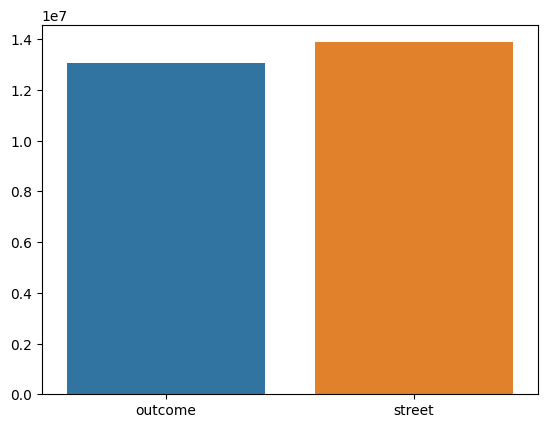

In [83]:
sns.barplot(y=[len(df_outcome), len(df_street)], x=['outcome', 'street'])

In [84]:
df_outcome.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')

### Street Data cleaning

In [85]:
df_street.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [86]:
len(df_street[df_street['Crime ID'].duplicated()])

152336

In [87]:
df_street[df_street['Crime ID'].duplicated()]['Crime ID'].iloc[1:7].values

array(['fe328411239c341535923c864b122302a9e5af6e86432b4f09708352b9130e56',
       'fe328411239c341535923c864b122302a9e5af6e86432b4f09708352b9130e56',
       'f856ff84b11821d5df530d4ec6e09d77b8747f84024b5f3331c3fba47936f26e',
       '9b68ded2da856cff93e51ce70ad851584e4bd8f9c89786606937799a02327307',
       'be61f1b51fd28b52d0e7e05d4863df8848d5a2f87fe680bc901b004d8535f3d3',
       '171574fdd0ac7035928675925242974cace5d2883f72d23332c664b42434dec6'],
      dtype=object)

In [88]:
df_street[df_street['Crime ID'] == 'be61f1b51fd28b52d0e7e05d4863df8848d5a2f87fe680bc901b004d8535f3d3']

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
937,be61f1b51fd28b52d0e7e05d4863df8848d5a2f87fe680...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.427727,51.311880,On or near Frederick Avenue,E01014445,Bath and North East Somerset 022E,Public order,Status update unavailable
938,be61f1b51fd28b52d0e7e05d4863df8848d5a2f87fe680...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.433886,51.312343,On or near Red Post Court,E01014445,Bath and North East Somerset 022E,Public order,Status update unavailable


In [89]:
street_duplicate = df_street[df_street['Crime ID'].duplicated()]['Crime ID'].values

In [90]:
street_boolean_series = df_street['Crime ID'].isin(street_duplicate)

In [91]:
df_street = df_street[~street_boolean_series]
df_street

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,d3dc12297836c17e2a1f70b7b17a4002adc070656dd1f2...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable
1,ab8cb1c81b5fa1c4ec741cb907822bd18873e68832b245...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
2,a0715131ca28423cbd09722de2af87d46613967ed10403...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
3,98164008d84763bd35064266539da77e4e0d6583e2a65e...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Public order,Status update unavailable
4,61be2a9421e9a9df0967aa167031d5b4559f97332e7597...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.534338,51.417697,On or near Scotland Lane,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Local resolution
...,...,...,...,...,...,...,...,...,...,...,...
4205,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4206,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
4207,106e3cf76d345fd82004646074abe413b9b26af2aabb1f...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Shoplifting,Under investigation
4208,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


In [98]:
len(df_street[df_street['Crime ID'].duplicated()])

0

### Outcome Data cleaning


In [92]:
len(df_outcome[df_outcome['Crime ID'].duplicated()])

933322

In [93]:
outcome_duplicate = df_outcome[df_outcome['Crime ID'].duplicated()]['Crime ID'].values

In [94]:
outcome_boolean_series = df_outcome['Crime ID'].isin(outcome_duplicate)

In [95]:
df_outcome = df_outcome[~outcome_boolean_series]
df_outcome.reset_index()
df_outcome

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
39,e919485de981566dcb9ad4c5956cd8a9df4fcdbbb4121c...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511333,51.475949,On or near MULBERRY GARDENS,E01014976,South Gloucestershire 026F,Unable to prosecute suspect
40,ef649d2296d90513fef48bf65adac7ab199725c941b036...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.902586,51.360319,On or near SHERPERDS WAY,E01032667,North Somerset 026C,Unable to prosecute suspect
110,628b6e8df09c78a3ae7d897e1344722e4609c3fe62af37...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.728708,51.142566,On or near Petrol Station,E01029047,Mendip 012A,Further action is not in the public interest
111,235129cbd9a52022e1325f415125fb180753da2e47f404...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.916264,51.362695,On or near TORRINGTON CRESCENT,E01014835,North Somerset 016C,Unable to prosecute suspect
112,67fcfafcfb2070e2f2ff781dcd8586d51875887579b589...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-3.461711,51.205977,On or near Theme/Adventure Park,E01029322,West Somerset 002A,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...,...,...
3595,9bcc03f251f9b031904f80bf2addb8c8c124ee85539b93...,2023-01,Wiltshire Police,Wiltshire Police,-1.756233,51.561152,On or near Frobisher Drive,E01015572,Swindon 016B,Unable to prosecute suspect
3596,6c2d9486b0fcf6c7dd568fb2d04306d4e3468cd378c777...,2023-01,Wiltshire Police,Wiltshire Police,-1.848971,51.488063,On or near Norborne Road,E01031884,Wiltshire 012E,Unable to prosecute suspect
3597,80e2338fa2c3af94d10ffac27a977866288b810671f7c2...,2023-01,Wiltshire Police,Wiltshire Police,-2.141712,51.362075,On or near Telford Drive,E01032070,Wiltshire 021D,Unable to prosecute suspect
3598,eb09d0c9adc0604cfe4e29d04f70a29b4ad84565016349...,2023-01,Wiltshire Police,Wiltshire Police,-1.743332,51.562014,On or near Old School Court,E01015538,Swindon 016A,Unable to prosecute suspect


In [96]:
len(df_outcome[df_outcome['Crime ID'].duplicated()])

0

In [99]:
print(df_outcome.columns)
print(df_street.columns)

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')
Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category'],
      dtype='object')


In [100]:
df = df_street.merge(df_outcome, how='inner', on=['Crime ID', 'Month', 'Reported by', 'Falls within', 
                                                  'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name'])
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Outcome type
0,c9e13644419c09d866b0677c611c270a7ec07469b07b22...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.350371,51.391561,On or near Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified,Investigation complete; no suspect identified
1,b56fb9a76ae74d64bcf2a977260f288ecc0368c287c003...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.360522,51.381127,On or near Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...,Further investigation is not in the public int...
2,a645e84c245557bc94c24543bc3fbb001da8bf58c0aa8a...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Court result unavailable,Suspect charged
3,adb977ce325d741b951aee2b769015322b74f857ce81b7...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Court result unavailable,Suspect charged
4,b213f886ce58f48c9ca2c39745ab1b8a1825e3239a6ae6...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Court result unavailable,Suspect charged
...,...,...,...,...,...,...,...,...,...,...,...,...
2130544,e5ad1fe3d37c380049cd9b41335af39a3b90efa87cca84...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Investigation complete; no suspect identified
2130545,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Investigation complete; no suspect identified
2130546,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Investigation complete; no suspect identified
2130547,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,Investigation complete; no suspect identified


In [103]:
df.drop(['Last outcome category'], axis=1, inplace=True, errors='ignore')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130549 entries, 0 to 2130548
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Crime ID      object 
 1   Month         object 
 2   Reported by   object 
 3   Falls within  object 
 4   Longitude     float64
 5   Latitude      float64
 6   Location      object 
 7   LSOA code     object 
 8   LSOA name     object 
 9   Crime type    object 
 10  Outcome type  object 
dtypes: float64(2), object(9)
memory usage: 178.8+ MB


In [109]:
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type
0,c9e13644419c09d866b0677c611c270a7ec07469b07b22...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.350371,51.391561,On or near Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified
1,b56fb9a76ae74d64bcf2a977260f288ecc0368c287c003...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.360522,51.381127,On or near Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...
2,a645e84c245557bc94c24543bc3fbb001da8bf58c0aa8a...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged
3,adb977ce325d741b951aee2b769015322b74f857ce81b7...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
4,b213f886ce58f48c9ca2c39745ab1b8a1825e3239a6ae6...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
...,...,...,...,...,...,...,...,...,...,...,...
2130544,e5ad1fe3d37c380049cd9b41335af39a3b90efa87cca84...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130545,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130546,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130547,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


In [110]:
df.to_csv('clean_data/clean_data_v2.csv', index=False)

## Importing Population Data

In [3]:
pop_xls_file = pd.ExcelFile('data/lsoa_population_data.xlsx')

In [5]:
pop_xls_file.sheet_names

['Contents',
 'Terms and conditions',
 'Notes and definitions',
 'Mid-2020 Persons',
 'Mid-2020 Males',
 'Mid-2020 Females',
 'Median Age',
 'Related publications']

In [10]:
pop_df = pd.read_excel('data\lsoa_population_data.xlsx', sheet_name='Mid-2020 Persons', header=4)
pop_df

c:\Users\saqui\.conda\envs\lab\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,LSOA Code,LSOA Name,LA Code (2018 boundaries),LA name (2018 boundaries),LA Code (2021 boundaries),LA name (2021 boundaries),All Ages,0,1,2,...,81,82,83,84,85,86,87,88,89,90+
0,E01011949,Hartlepool 009A,E06000001,Hartlepool,E06000001,Hartlepool,1944,20,32,22,...,2,9,14,9,8,7,9,2,2,7
1,E01011950,Hartlepool 008A,E06000001,Hartlepool,E06000001,Hartlepool,1298,14,18,15,...,5,3,1,2,2,2,3,2,1,4
2,E01011951,Hartlepool 007A,E06000001,Hartlepool,E06000001,Hartlepool,1208,18,13,12,...,10,7,2,4,4,5,1,1,4,2
3,E01011952,Hartlepool 002A,E06000001,Hartlepool,E06000001,Hartlepool,1724,23,20,32,...,10,13,14,7,17,18,12,10,8,67
4,E01011953,Hartlepool 002B,E06000001,Hartlepool,E06000001,Hartlepool,2026,27,20,32,...,4,6,6,10,1,2,4,1,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001320,Merthyr Tydfil 007C,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,1430,17,15,11,...,3,3,3,8,11,9,2,6,9,10
34749,W01001321,Merthyr Tydfil 007D,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,1576,21,19,16,...,2,9,3,7,7,3,10,2,3,12
34750,W01001322,Merthyr Tydfil 007E,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,1626,24,23,22,...,10,9,8,4,8,2,6,1,3,15
34751,W01001324,Merthyr Tydfil 003E,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,2106,19,20,32,...,20,16,16,15,15,12,7,6,8,34


In [16]:
pop_df.shape

(34753, 98)

In [17]:
pop_df.drop(['LA Code (2018 boundaries)', 'LA name (2018 boundaries)', 
             'LA Code (2021 boundaries)', 'LA name (2021 boundaries)'], 
            axis=1, inplace=True, errors='ignore')

In [18]:
pop_df

,LSOA Code,LSOA Name,All Ages,0,1,2,3,4,5,6,...,81,82,83,84,85,86,87,88,89,90+
0,E01011949,Hartlepool 009A,1944,20,32,22,17,27,31,23,...,2,9,14,9,8,7,9,2,2,7
1,E01011950,Hartlepool 008A,1298,14,18,15,13,11,10,17,...,5,3,1,2,2,2,3,2,1,4
2,E01011951,Hartlepool 007A,1208,18,13,12,9,16,10,11,...,10,7,2,4,4,5,1,1,4,2
3,E01011952,Hartlepool 002A,1724,23,20,32,19,28,19,29,...,10,13,14,7,17,18,12,10,8,67
4,E01011953,Hartlepool 002B,2026,27,20,32,39,27,44,34,...,4,6,6,10,1,2,4,1,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001320,Merthyr Tydfil 007C,1430,17,15,11,9,6,20,18,...,3,3,3,8,11,9,2,6,9,10
34749,W01001321,Merthyr Tydfil 007D,1576,21,19,16,26,21,24,19,...,2,9,3,7,7,3,10,2,3,12
34750,W01001322,Merthyr Tydfil 007E,1626,24,23,22,26,23,24,20,...,10,9,8,4,8,2,6,1,3,15
34751,W01001324,Merthyr Tydfil 003E,2106,19,20,32,18,29,19,11,...,20,16,16,15,15,12,7,6,8,34


In [45]:
crime_df = pd.read_csv('clean_data\clean_data_v2.csv')
crime_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type
0,c9e13644419c09d866b0677c611c270a7ec07469b07b22...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.350371,51.391561,On or near Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified
1,b56fb9a76ae74d64bcf2a977260f288ecc0368c287c003...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.360522,51.381127,On or near Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...
2,a645e84c245557bc94c24543bc3fbb001da8bf58c0aa8a...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged
3,adb977ce325d741b951aee2b769015322b74f857ce81b7...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
4,b213f886ce58f48c9ca2c39745ab1b8a1825e3239a6ae6...,2020-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
...,...,...,...,...,...,...,...,...,...,...,...
2130544,e5ad1fe3d37c380049cd9b41335af39a3b90efa87cca84...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130545,474af4ae9e4f8813c2e5d983d663bb4e1347d1df474a7d...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130546,7b01c0f45837c1cb1c75d03f422bc6e34e05148cf6d973...,2023-01,Wiltshire Police,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130547,2aa6988775439e9c1b52f17d13d6e434e0f3c91b70fed0...,2023-01,Wiltshire Police,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


In [46]:
crime_df.drop(['Crime ID', 'Reported by'], axis=1, inplace=True, errors='ignore')

In [47]:
crime_df

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type
0,2020-02,Avon and Somerset Constabulary,-2.350371,51.391561,On or near Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified
1,2020-02,Avon and Somerset Constabulary,-2.360522,51.381127,On or near Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...
2,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged
3,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
4,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
...,...,...,...,...,...,...,...,...,...
2130544,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130545,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130546,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130547,2023-01,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


In [48]:
crime_df.columns

Index(['Month', 'Falls within', 'Longitude', 'Latitude', 'Location',
       'LSOA code', 'LSOA name', 'Crime type', 'Outcome type'],
      dtype='object')

In [26]:
pop_df.columns

Index(['LSOA Code', 'LSOA Name',  'All Ages',           0,           1,
                 2,           3,           4,           5,           6,
                 7,           8,           9,          10,          11,
                12,          13,          14,          15,          16,
                17,          18,          19,          20,          21,
                22,          23,          24,          25,          26,
                27,          28,          29,          30,          31,
                32,          33,          34,          35,          36,
                37,          38,          39,          40,          41,
                42,          43,          44,          45,          46,
                47,          48,          49,          50,          51,
                52,          53,          54,          55,          56,
                57,          58,          59,          60,          61,
                62,          63,          64,          65,      

In [49]:
df = crime_df.merge(pop_df, how='left', left_on='LSOA code', right_on='LSOA Code')
df

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type,LSOA Code,...,81,82,83,84,85,86,87,88,89,90+
0,2020-02,Avon and Somerset Constabulary,-2.350371,51.391561,On or near Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified,E01014468,...,2,7,4,3,1,10,5,1,1,5
1,2020-02,Avon and Somerset Constabulary,-2.360522,51.381127,On or near Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...,E01014370,...,12,13,19,15,17,10,13,11,13,50
2,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged,E01014370,...,12,13,19,15,17,10,13,11,13,50
3,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,E01014370,...,12,13,19,15,17,10,13,11,13,50
4,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,E01014370,...,12,13,19,15,17,10,13,11,13,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130544,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,E01031995,...,13,10,14,6,9,6,6,8,8,14
2130545,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,E01031995,...,13,10,14,6,9,6,6,8,8,14
2130546,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,E01031995,...,13,10,14,6,9,6,6,8,8,14
2130547,2023-01,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,E01031995,...,13,10,14,6,9,6,6,8,8,14


In [50]:
df.drop(['LSOA Code'], axis=1, inplace=True, errors='ignore')

In [51]:
df

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type,LSOA Name,...,81,82,83,84,85,86,87,88,89,90+
0,2020-02,Avon and Somerset Constabulary,-2.350371,51.391561,On or near Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified,Bath and North East Somerset 006D,...,2,7,4,3,1,10,5,1,1,5
1,2020-02,Avon and Somerset Constabulary,-2.360522,51.381127,On or near Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
2,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
3,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
4,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130544,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130545,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130546,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130547,2023-01,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14


In [52]:
df.columns

Index([       'Month', 'Falls within',    'Longitude',     'Latitude',
           'Location',    'LSOA code',    'LSOA name',   'Crime type',
       'Outcome type',    'LSOA Name',
       ...
                   81,             82,             83,             84,
                   85,             86,             87,             88,
                   89,          '90+'],
      dtype='object', length=102)

In [53]:
df['Location'].unique()

array(['On or near Supermarket', 'On or near Shopping Area',
       'On or near Parking Area', ..., 'On or near Downton Hill',
       'On or near Church Hatch', 'On or near Church Leat'], dtype=object)

In [54]:
df['Location'].value_counts()

Location
On or near                     220568
On or near Supermarket         169213
On or near Parking Area        147050
On or near Petrol Station      109375
On or near Shopping Area       104713
                                ...  
On or near Hobbies Lane             1
On or near Lanecroft                1
On or near Thompsons Meadow         1
On or near Tylers Way               1
On or near Church Leat              1
Name: count, Length: 157978, dtype: int64

In [55]:
import re
df['Location'].apply(lambda x: re.sub("On or near","",x))

0             Supermarket
1           Shopping Area
2            Parking Area
3            Parking Area
4            Parking Area
                ...      
2130544                  
2130545                  
2130546                  
2130547       The Borough
2130548        Green Lane
Name: Location, Length: 2130549, dtype: object

In [56]:
df['Location'] = df['Location'].apply(lambda x: re.sub("On or near","",x))

In [62]:
df

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type,LSOA Name,...,81,82,83,84,85,86,87,88,89,90+
0,2020-02,Avon and Somerset Constabulary,-2.350371,51.391561,Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified,Bath and North East Somerset 006D,...,2,7,4,3,1,10,5,1,1,5
1,2020-02,Avon and Somerset Constabulary,-2.360522,51.381127,Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
2,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
3,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
4,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130544,2023-01,Wiltshire Police,-1.759022,50.994660,,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130545,2023-01,Wiltshire Police,-1.759022,50.994660,,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130546,2023-01,Wiltshire Police,-1.759022,50.994660,,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130547,2023-01,Wiltshire Police,-1.750954,50.992992,The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14


In [58]:
df['Location'].value_counts()

Location
                     220568
 Supermarket         169213
 Parking Area        147050
 Petrol Station      109375
 Shopping Area       104713
                      ...  
 Hobbies Lane             1
 Lanecroft                1
 Thompsons Meadow         1
 Tylers Way               1
 Church Leat              1
Name: count, Length: 157978, dtype: int64

In [61]:
df.to_csv('clean_data/pop_data.csv', index=False, header=True, columns=df.columns)

In [63]:
ddff = pd.read_csv('clean_data\pop_data.csv')
ddff

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type,LSOA Name,...,81,82,83,84,85,86,87,88,89,90+
0,2020-02,Avon and Somerset Constabulary,-2.350371,51.391561,Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified,Bath and North East Somerset 006D,...,2,7,4,3,1,10,5,1,1,5
1,2020-02,Avon and Somerset Constabulary,-2.360522,51.381127,Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
2,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
3,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
4,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged,Bath and North East Somerset 007A,...,12,13,19,15,17,10,13,11,13,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130544,2023-01,Wiltshire Police,-1.759022,50.994660,,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130545,2023-01,Wiltshire Police,-1.759022,50.994660,,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130546,2023-01,Wiltshire Police,-1.759022,50.994660,,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14
2130547,2023-01,Wiltshire Police,-1.750954,50.992992,The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified,Wiltshire 062E,...,13,10,14,6,9,6,6,8,8,14


In [65]:
pop_df['All Ages'].sum()

59719724

In [68]:
pop_df

,LSOA Code,LSOA Name,All Ages,0,1,2,3,4,5,6,...,81,82,83,84,85,86,87,88,89,90+
0,E01011949,Hartlepool 009A,1944,20,32,22,17,27,31,23,...,2,9,14,9,8,7,9,2,2,7
1,E01011950,Hartlepool 008A,1298,14,18,15,13,11,10,17,...,5,3,1,2,2,2,3,2,1,4
2,E01011951,Hartlepool 007A,1208,18,13,12,9,16,10,11,...,10,7,2,4,4,5,1,1,4,2
3,E01011952,Hartlepool 002A,1724,23,20,32,19,28,19,29,...,10,13,14,7,17,18,12,10,8,67
4,E01011953,Hartlepool 002B,2026,27,20,32,39,27,44,34,...,4,6,6,10,1,2,4,1,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001320,Merthyr Tydfil 007C,1430,17,15,11,9,6,20,18,...,3,3,3,8,11,9,2,6,9,10
34749,W01001321,Merthyr Tydfil 007D,1576,21,19,16,26,21,24,19,...,2,9,3,7,7,3,10,2,3,12
34750,W01001322,Merthyr Tydfil 007E,1626,24,23,22,26,23,24,20,...,10,9,8,4,8,2,6,1,3,15
34751,W01001324,Merthyr Tydfil 003E,2106,19,20,32,18,29,19,11,...,20,16,16,15,15,12,7,6,8,34


In [67]:
crime_df

,Month,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Outcome type
0,2020-02,Avon and Somerset Constabulary,-2.350371,51.391561,On or near Supermarket,E01014468,Bath and North East Somerset 006D,Robbery,Investigation complete; no suspect identified
1,2020-02,Avon and Somerset Constabulary,-2.360522,51.381127,On or near Shopping Area,E01014370,Bath and North East Somerset 007A,Public order,Further investigation is not in the public int...
2,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Robbery,Suspect charged
3,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
4,2020-02,Avon and Somerset Constabulary,-2.359175,51.383451,On or near Parking Area,E01014370,Bath and North East Somerset 007A,Shoplifting,Suspect charged
...,...,...,...,...,...,...,...,...,...
2130544,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130545,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130546,2023-01,Wiltshire Police,-1.759022,50.994660,On or near,E01031995,Wiltshire 062E,Other theft,Investigation complete; no suspect identified
2130547,2023-01,Wiltshire Police,-1.750954,50.992992,On or near The Borough,E01031995,Wiltshire 062E,Shoplifting,Investigation complete; no suspect identified


In [83]:
lsoa_df = df.groupby(['LSOA code', 'LSOA name'])[['Crime type']].agg(len).reset_index()
lsoa_df

,LSOA code,LSOA name,Crime type
0,E01000001,City of London 001A,45
1,E01000002,City of London 001B,113
2,E01000003,City of London 001C,16
3,E01000005,City of London 001E,184
4,E01000006,Barking and Dagenham 016A,11
...,...,...,...
33061,W01001954,Cardiff 006F,13
33062,W01001955,Swansea 025F,1255
33063,W01001956,Swansea 023E,62
33064,W01001957,Swansea 025G,156


In [84]:
pop_crime_df = lsoa_df.merge(pop_df, left_on=['LSOA code', 'LSOA name'], right_on=['LSOA Code', 'LSOA Name'], how='left')
pop_crime_df

,LSOA code,LSOA name,Crime type,LSOA Code,LSOA Name,All Ages,0,1,2,3,...,81,82,83,84,85,86,87,88,89,90+
0,E01000001,City of London 001A,45,E01000001,City of London 001A,1749,12,8,21,21,...,14,11,10,6,8,1,6,2,3,45
1,E01000002,City of London 001B,113,E01000002,City of London 001B,1678,9,15,18,13,...,17,13,16,3,10,1,5,1,8,29
2,E01000003,City of London 001C,16,E01000003,City of London 001C,1900,17,32,10,33,...,6,17,11,4,12,6,8,5,8,23
3,E01000005,City of London 001E,184,E01000005,City of London 001E,2181,8,13,20,14,...,13,3,0,8,8,1,8,1,0,9
4,E01000006,Barking and Dagenham 016A,11,E01000006,Barking and Dagenham 016A,2117,62,36,41,41,...,6,12,7,1,3,3,3,3,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33061,W01001954,Cardiff 006F,13,W01001954,Cardiff 006F,1497,3,7,6,8,...,6,16,14,12,13,10,10,13,7,24
33062,W01001955,Swansea 025F,1255,W01001955,Swansea 025F,2050,20,10,8,6,...,2,4,4,10,4,5,4,3,3,11
33063,W01001956,Swansea 023E,62,W01001956,Swansea 023E,2185,22,13,12,21,...,13,15,12,11,17,10,8,8,2,5
33064,W01001957,Swansea 025G,156,W01001957,Swansea 025G,1035,6,5,3,6,...,11,4,3,5,7,5,3,7,1,8


In [85]:
pop_crime_df.rename({'Crime type':'crimes reported'}, axis=1, inplace=True, errors='ignore')

In [ ]:
pop_crime_df.drop(['LSOA Code', 'LSOA Name'], axis=1, inplace=True, errors='ignore')

In [86]:
pop_crime_df

,LSOA code,LSOA name,crimes reported,LSOA Code,LSOA Name,All Ages,0,1,2,3,...,81,82,83,84,85,86,87,88,89,90+
0,E01000001,City of London 001A,45,E01000001,City of London 001A,1749,12,8,21,21,...,14,11,10,6,8,1,6,2,3,45
1,E01000002,City of London 001B,113,E01000002,City of London 001B,1678,9,15,18,13,...,17,13,16,3,10,1,5,1,8,29
2,E01000003,City of London 001C,16,E01000003,City of London 001C,1900,17,32,10,33,...,6,17,11,4,12,6,8,5,8,23
3,E01000005,City of London 001E,184,E01000005,City of London 001E,2181,8,13,20,14,...,13,3,0,8,8,1,8,1,0,9
4,E01000006,Barking and Dagenham 016A,11,E01000006,Barking and Dagenham 016A,2117,62,36,41,41,...,6,12,7,1,3,3,3,3,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33061,W01001954,Cardiff 006F,13,W01001954,Cardiff 006F,1497,3,7,6,8,...,6,16,14,12,13,10,10,13,7,24
33062,W01001955,Swansea 025F,1255,W01001955,Swansea 025F,2050,20,10,8,6,...,2,4,4,10,4,5,4,3,3,11
33063,W01001956,Swansea 023E,62,W01001956,Swansea 023E,2185,22,13,12,21,...,13,15,12,11,17,10,8,8,2,5
33064,W01001957,Swansea 025G,156,W01001957,Swansea 025G,1035,6,5,3,6,...,11,4,3,5,7,5,3,7,1,8


In [74]:
df.groupby(['Month', 'LSOA code'])[['Crime type']].agg(len)

Crime type
Month   LSOA code            
2020-02 E01000001           5
        E01000002           2
        E01000005           3
        E01000007           3
        E01000008           1
...                       ...
2023-01 W01001954           4
        W01001955         111
        W01001956           5
        W01001957          10
        W01001958          10

[463586 rows x 1 columns]